# Statistische Analyse von YouTube Videos

Importieren aller benötigter Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

Einlesen alle Dateien, inklusive CSV und JSON

In [2]:
de_videos =pd.read_csv('input/DEvideos.csv')
de_kategorien = pd.read_json('input/DE_category_id.json')
de_kategorien = {int(category['id']): category['snippet']['title'] for category in de_kategorien['items']}
us_videos =pd.read_csv('input/USvideos.csv')
us_kategorien = pd.read_json('input/US_category_id.json')
us_kategorien = {int(category['id']): category['snippet']['title'] for category in us_kategorien['items']}
ka_videos =pd.read_csv('input/CAvideos.csv')
ka_kategorien = pd.read_json('input/CA_category_id.json')
ka_kategorien = {int(category['id']): category['snippet']['title'] for category in ka_kategorien['items']}
gb_videos =pd.read_csv('input/GBvideos.csv')
gb_kategorien = pd.read_json('input/GB_category_id.json')
gb_kategorien = {int(category['id']): category['snippet']['title'] for category in gb_kategorien['items']}

Zusammenfügen aller Kategorien zu einem Dictionary

In [3]:
alle_kategorien = de_kategorien
for (key,value) in us_kategorien.items():
    if key not in alle_kategorien:
        alle_kategorien[key] = value
for (key,value) in ka_kategorien.items():
    if key not in alle_kategorien:
        alle_kategorien[key] = value
for (key,value) in gb_kategorien.items():
    if key not in alle_kategorien:
        alle_kategorien[key] = value

## Datenbereinigung und Preprocessing

Anpassen der Datumsangaben

In [4]:
de_videos['trending_date']=pd.to_datetime(de_videos['trending_date'], format='%y.%d.%m').dt.date
us_videos['trending_date']=pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date
ka_videos['trending_date']=pd.to_datetime(ka_videos['trending_date'], format='%y.%d.%m').dt.date
gb_videos['trending_date']=pd.to_datetime(gb_videos['trending_date'], format='%y.%d.%m').dt.date

In [5]:
de_videos['publish_date']=pd.to_datetime(de_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date
de_videos.drop('publish_time',axis=1,inplace=True)
us_videos['publish_date']=pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date
us_videos.drop('publish_time',axis=1,inplace=True)
ka_videos['publish_date']=pd.to_datetime(ka_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date
ka_videos.drop('publish_time',axis=1,inplace=True)
gb_videos['publish_date']=pd.to_datetime(gb_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date
gb_videos.drop('publish_time',axis=1,inplace=True)

Einträge mit null-Value bei Description mit einem Leerstring füllen

In [6]:
de_videos['description'] = de_videos['description'].fillna('')
us_videos['description'] = us_videos['description'].fillna('')
ka_videos['description'] = ka_videos['description'].fillna('')
gb_videos['description'] = gb_videos['description'].fillna('')

Füllen der Kategorie-ID's mit den entsprechenden Strings

In [7]:
de_videos.insert(4,'category', de_videos['category_id'].map(alle_kategorien))
de_videos.drop('category_id',axis=1,inplace=True)
us_videos.insert(4,'category', us_videos['category_id'].map(alle_kategorien))
us_videos.drop('category_id',axis=1,inplace=True)
ka_videos.insert(4,'category', ka_videos['category_id'].map(alle_kategorien))
ka_videos.drop('category_id',axis=1,inplace=True)
gb_videos.insert(4,'category', gb_videos['category_id'].map(alle_kategorien))
gb_videos.drop('category_id',axis=1,inplace=True)

Zusammenfassen aller Videodateien zu einer großen Datei

In [8]:
de_videos['country']='Deutschland'
us_videos['country']='USA'
ka_videos['country']='Kanada'
gb_videos['country']='Großbritannien'
frames=[de_videos,us_videos,ka_videos,gb_videos]
alle_videos=pd.concat(frames)

## Analyse

### Standardabfragen zu Views/ Likes/ Dislikes und Comments

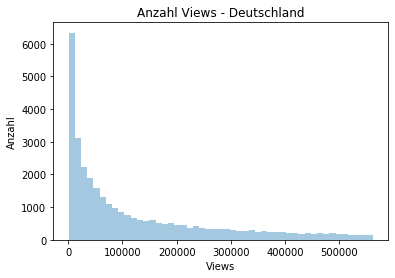

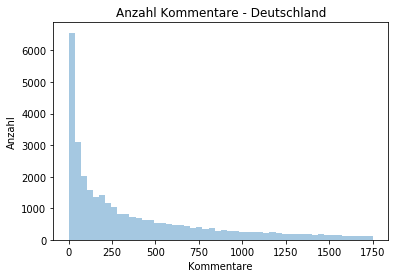

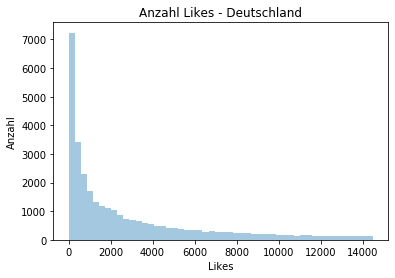

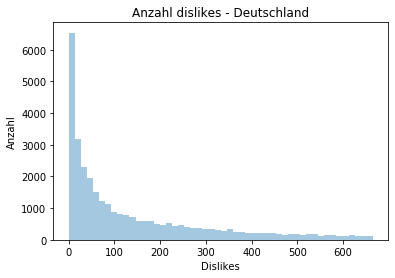

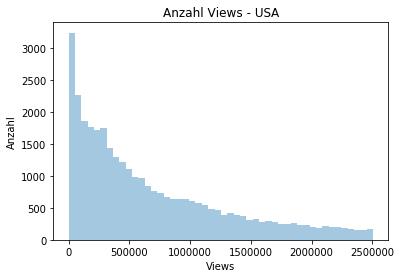

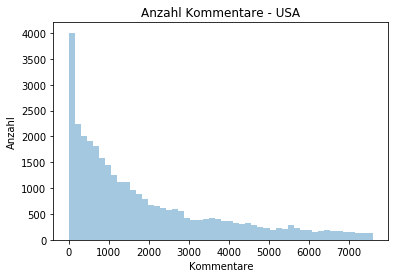

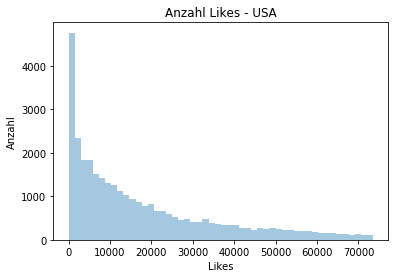

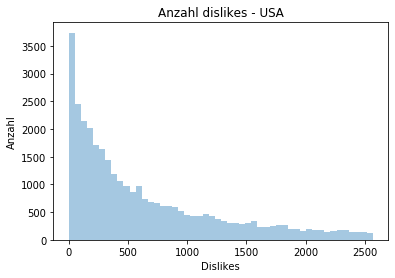

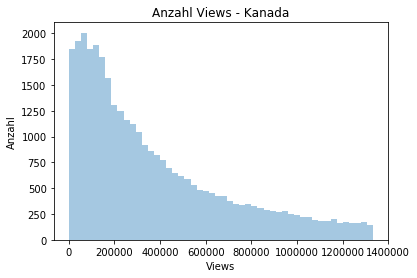

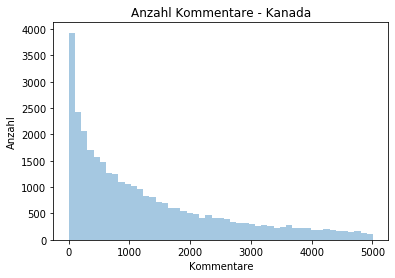

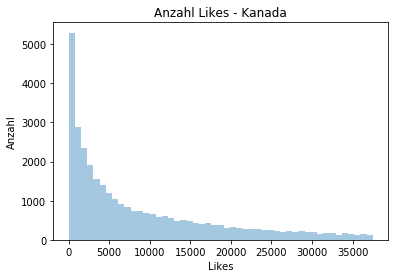

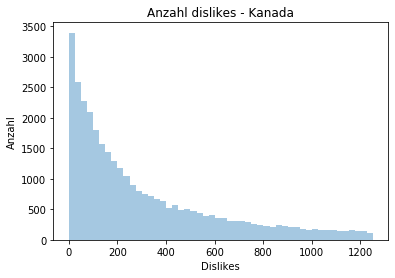

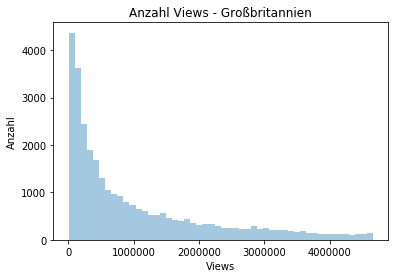

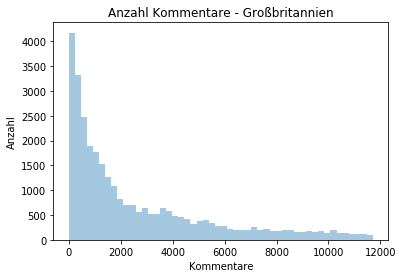

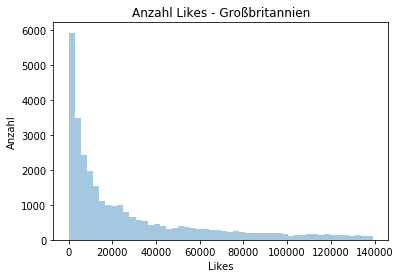

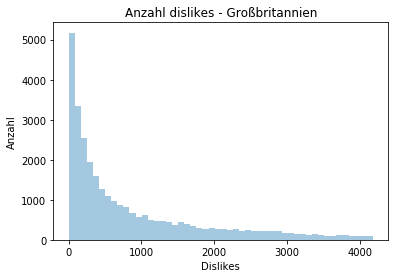

In [9]:
alle_dateien=[de_videos,us_videos,ka_videos,gb_videos]
for verarbeitungs_daten in alle_dateien:

    f,ax1=plt.subplots()
    column='views'
    anzeige_daten = verarbeitungs_daten[verarbeitungs_daten[column]<
                    (verarbeitungs_daten[column].quantile(0.75)+(verarbeitungs_daten[column].quantile(0.5)))][column]
    sns.distplot(anzeige_daten,kde=False,ax=ax1).set_title('Anzahl Views - '+verarbeitungs_daten['country'][0])
    ax1.set_xlabel('Views')
    ax1.set_ylabel('Anzahl')


    f,ax1=plt.subplots()
    column='comment_count'
    anzeige_daten = verarbeitungs_daten[verarbeitungs_daten[column]<
                    (verarbeitungs_daten[column].quantile(0.75)+(verarbeitungs_daten[column].quantile(0.5)))][column]
    sns.distplot(anzeige_daten,kde=False,ax=ax1).set_title('Anzahl Kommentare - '+verarbeitungs_daten['country'][0])
    ax1.set_xlabel('Kommentare')
    ax1.set_ylabel('Anzahl')
    
    f,ax1=plt.subplots()
    column='likes'
    anzeige_daten = verarbeitungs_daten[verarbeitungs_daten[column]<
                    (verarbeitungs_daten[column].quantile(0.75)+(verarbeitungs_daten[column].quantile(0.5)))][column]
    sns.distplot(anzeige_daten,kde=False,ax=ax1).set_title('Anzahl Likes - '+verarbeitungs_daten['country'][0])
    ax1.set_xlabel('Likes')
    ax1.set_ylabel('Anzahl')
    
    f,ax1=plt.subplots()
    column='dislikes'
    anzeige_daten = verarbeitungs_daten[verarbeitungs_daten[column]<
                    (verarbeitungs_daten[column].quantile(0.75)+(verarbeitungs_daten[column].quantile(0.5)))][column]
    sns.distplot(anzeige_daten,kde=False,ax=ax1).set_title('Anzahl dislikes - '+verarbeitungs_daten['country'][0])
    ax1.set_xlabel('Dislikes')
    ax1.set_ylabel('Anzahl')

(4, -0.1)

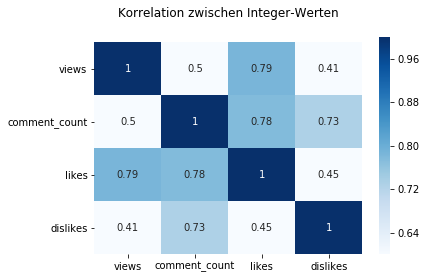

In [10]:
corr = alle_videos[['views','comment_count','likes','dislikes']].corr()
f,ax1 = plt.subplots()    
sns.heatmap(corr,cmap='Blues',vmin=0.6,annot=True,annot_kws={"size":10},ax=ax1)
ax1.set_title("Korrelation zwischen Integer-Werten",pad=20)
ax1.set_ylim(4,-0.1)

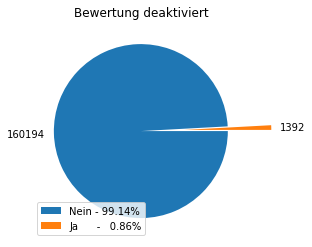

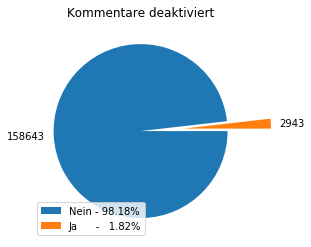

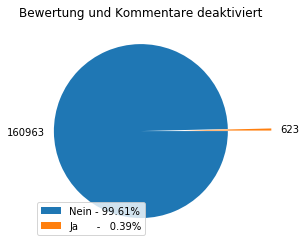

In [13]:
value_counts=alle_videos['ratings_disabled'].value_counts().to_dict()

values = [value_counts[False], value_counts[True]]
labels= ['Nein - 99.14%', 'Ja      -   0.86%']
explode = (0, 0.5)
plt.pie(values,labels=values,explode=explode, counterclock=False, shadow=False)
plt.title('Bewertung deaktiviert')
plt.legend(labels,loc=3)
plt.show()

value_counts=alle_videos['comments_disabled'].value_counts().to_dict()

values = [value_counts[False], value_counts[True]]
labels= ['Nein - 98.18%', 'Ja      -   1.82%']
explode = (0, 0.5)
plt.pie(values,labels=values,explode=explode,counterclock=False, shadow=False)
plt.title('Kommentare deaktiviert')
plt.legend(labels,loc=3)
plt.show()

alle_videos['comments_and_rating_disabled']= (alle_videos['ratings_disabled'] & alle_videos['comments_disabled'])
value_counts=alle_videos['comments_and_rating_disabled'].value_counts().to_dict()

values = [value_counts[False], value_counts[True]]
labels= ['Nein - 99.61%', 'Ja      -   0.39%']
explode = (0, 0.5)
plt.pie(values,labels=values,explode=explode,counterclock=False, shadow=False)
plt.title('Bewertung und Kommentare deaktiviert')
plt.legend(labels,loc=3)
plt.show()

### Abfragen zum Titel

### Korrelation von Trend Videos zwischen den einzelnen Ländern

### Abfragen zu den Kategorien

### Abfragen zum Veröffentlichungsdatum und zum Trend Datum

### Abfragen zu den Tags